# EDA данных для модели оценки влияния условий жизни учащихся в на их успеваемость по математике

In [266]:
import warnings
from scipy.stats import ttest_ind
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.simplefilter('ignore')

warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [287]:
display(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,NaN,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [2]:
# ОПИСАНИЕ ЗНАЧЕНИЙ В КОЛОНКАХ:

# 1 school — аббревиатура школы, в которой учится ученик
# 2 sex — пол ученика ('F' - женский, 'M' - мужской)
# 3 age — возраст ученика (от 15 до 22)
# 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
# 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
#                         'at_home' - не работает, 'other' - другое)
# 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
#                         'at_home' - не работает, 'other' - другое)
# 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
#                                    'course' - образовательная программа, 'other' - другое)
# 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# 16 schoolsup — дополнительная образовательная поддержка (yes или no)
# 17 famsup — семейная образовательная поддержка (yes или no)
# 18 paid — дополнительные платные занятия по математике (yes или no)
# 19 activities — дополнительные внеучебные занятия (yes или no)
# 20 nursery — посещал детский сад (yes или no)
# 21 higher — хочет получить высшее образование (yes или no)
# 22 internet — наличие интернета дома (yes или no)
# 23 romantic — в романтических отношениях (yes или no)
# 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# 28 absences — количество пропущенных занятий
# 29 score — баллы по госэкзамену по математике

## Предобработка

In [225]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [284]:
# Для удобства просмотра сортируем список названий колонок:

list_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health', 'absences', 'score']
list_columns.sort()
display(list_columns)

['Fedu',
 'Fjob',
 'Medu',
 'Mjob',
 'Pstatus',
 'absences',
 'activities',
 'address',
 'age',
 'failures',
 'famrel',
 'famsize',
 'famsup',
 'freetime',
 'goout',
 'guardian',
 'health',
 'higher',
 'internet',
 'nursery',
 'paid',
 'reason',
 'romantic',
 'school',
 'schoolsup',
 'score',
 'sex',
 'studytime',
 'studytime, granular',
 'traveltime']

In [267]:
# Корректируем названия колонок:
#   названия, начинающиеся с загалвной буквы, меняем для однообразия на названия со строчной буквы;
#   название 'studytime, granular' изменяем на 'studytime_granular'.

df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
              'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
              'freetime', 'goout', 'health', 'absences', 'score']

In [228]:
display(df)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [229]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [264]:
# Заменяем в df все пропуски и 'nan' на None в колонках с типом данных 'object':

for column_name in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    df[column_name] = df[column_name].astype(str).apply(
        lambda x: None if x.strip() == '' else x)
    df[column_name] = df[column_name].apply(
        lambda x: None if x == 'nan' else x)

In [268]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [285]:
# ИСПОЛЬЗУЕМЫЕ ФУНКЦИИ:

# Функция построения boxplot-диаграммы зависимости score от переменной в колонке 'column'


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

# Функция для проведения теста Стьюдента по проверим нулевую гипотезу о том, что распределения баллов
# на экзамене по различным параметрам неразличимы:


def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Первичный анализ данных в колонках

In [11]:
# Смотрим количество уникальных значений в колонках df:

for column_name in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                    'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                    'freetime', 'goout', 'health', 'absences', 'score']:
    print(column_name, df[column_name].nunique())

school 2
sex 2
age 8
address 2
famsize 2
pstatus 2
medu 5
fedu 6
mjob 5
fjob 5
reason 4
guardian 3
traveltime 4
studytime 4
failures 4
schoolsup 2
famsup 2
paid 2
activities 2
nursery 2
studytime_granular 4
higher 2
internet 2
romantic 2
famrel 6
freetime 5
goout 5
health 5
absences 36
score 18


Вывод: Количество уникальных значений в каждой колонке df не большое и их можно "просмотреть глазами"

In [240]:
# "Смотрим глазами" названия и количество уникальных значений, а также долю пропусков в колонках df:

for column_name in ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                    'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                    'freetime', 'goout', 'health', 'absences', 'score']:
    display(pd.DataFrame(df[column_name].value_counts()))
    print('Доля пропусков в колонке=', round(
        (100-df[column_name].value_counts().sum()/395*100), 1), '%')

,school
GP,349
MS,46


Доля пропусков в колонке= 0.0 %


,sex
F,208
M,187


Доля пропусков в колонке= 0.0 %


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Доля пропусков в колонке= 0.0 %


,address
U,295
R,83


Доля пропусков в колонке= 4.3 %


,famsize
GT3,261
LE3,107


Доля пропусков в колонке= 6.8 %


,pstatus
T,314
A,36


Доля пропусков в колонке= 11.4 %


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Доля пропусков в колонке= 0.8 %


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


Доля пропусков в колонке= 6.3 %


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


Доля пропусков в колонке= 4.8 %


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


Доля пропусков в колонке= 9.1 %


,reason
course,137
home,104
reputation,103
other,34


Доля пропусков в колонке= 4.3 %


,guardian
mother,250
father,86
other,28


Доля пропусков в колонке= 7.8 %


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Доля пропусков в колонке= 7.1 %


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Доля пропусков в колонке= 1.8 %


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Доля пропусков в колонке= 5.6 %


,schoolsup
no,335
yes,51


Доля пропусков в колонке= 2.3 %


,famsup
yes,219
no,137


Доля пропусков в колонке= 9.9 %


,paid
no,200
yes,155


Доля пропусков в колонке= 10.1 %


,activities
yes,195
no,186


Доля пропусков в колонке= 3.5 %


,nursery
yes,300
no,79


Доля пропусков в колонке= 4.1 %


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Доля пропусков в колонке= 1.8 %


,higher
yes,356
no,19


Доля пропусков в колонке= 5.1 %


,internet
yes,305
no,56


Доля пропусков в колонке= 8.6 %


,romantic
no,240
yes,124


Доля пропусков в колонке= 7.8 %


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


Доля пропусков в колонке= 7.1 %


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Доля пропусков в колонке= 2.8 %


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Доля пропусков в колонке= 2.0 %


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Доля пропусков в колонке= 3.8 %


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Доля пропусков в колонке= 7.3 %


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


Доля пропусков в колонке= 1.5 %


Выводы: 

1.Максимальная доля пропусков в колонках ~ 10%, поэтому можно считать, что исходные данные имеют приемлемое качество.

2.В колонке 'fedu' имеется одно значение (40.0), не указанное в описании данных (0,1,2,3,4), скорей всего это опечатка и имелось в виду 4.0, но, поскольку это не точно, и такое значение всего одно, заменим его на None.

3.При проведении корреляционного анализа необходимо обратить внимание на корреляцию данных в колонках 'studytime' и 'studytime_granular', последней колонки нет в описании данных, значения в ней отрицательные и распределение количества значений такое же как в 'studytime'.

4.В колонке 'famrel' имеется одно значение (-1), не указанное в описании данных (1,2,3,4,5), скорей всего это опечатка и имелось в виду 1, но, поскольку это не точно, и такое значение всего одно, заменим его на None.

5.Необходимо дополнительно проанализировать на наличие выбросов колонки 'absences' и 'score'.

In [259]:
# Заменяем нестандартные значения в колонках 'fedu' и 'famrel' на None:

df['fedu'] = df['fedu'].apply(lambda x: None if x == 40.0 else x)
df['famrel'] = df['famrel'].apply(lambda x: None if x == -1.0 else x)

## Анализ и очистка данных в колонках с числовыми данными

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


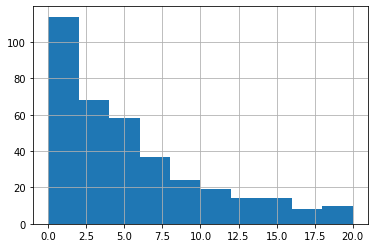

In [238]:
# Анализируем данные с колонке 'absences':

column_name = 'absences'
df[column_name].hist()
display(df[column_name].describe())
display(pd.DataFrame(df[column_name].value_counts()))

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

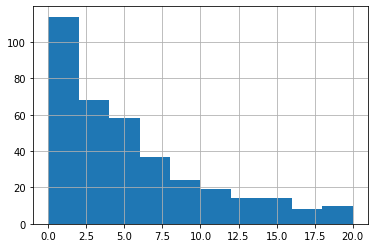

In [270]:
# Заменим на None выбросы (> Q3 + 1.5*IQR = 8 + 8*1.5 = 20) и снова посмотри на данные:

df['absences'] = df['absences'].apply(lambda x: None if x > 20.0 else x)
column_name = 'absences'
df[column_name].hist()
display(df[column_name].describe())

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


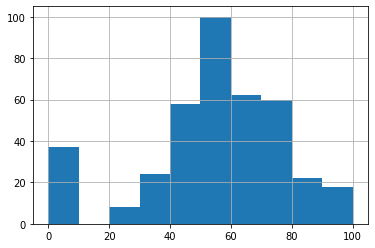

In [241]:
# Анализируем данные с колонке 'score':

column_name = 'score'
df[column_name].hist()
display(df[column_name].describe())
display(pd.DataFrame(df[column_name].value_counts()))

Комментарии:

Природа нулевых баллов не понятна, это может быть и реальная оценка и недопуск или неявка на экзамены, поэтому оставляем эти данные. На стадии создания модели, видимо, имеет смысл попробовать два варианта - с нулевыми баллами и без них, и сравнить результаты. 

In [245]:
# Проводим корреляционный анализ данных числовых типов:

df.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.151493,-0.155726
medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.065712,0.213349
fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,-0.021415,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.081801,-0.344338
studytime_granular,0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.078099,-0.115741
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.073509,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,0.093436,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.111587,-0.129685


Выводы: 

Поскольку колонки 'studytime' и 'studytime_granular' имеют 100% корелляцию (точнее антикорреляцию, коэффициент корреляции равен -1), то колонку 'studytime_granular' можно исключить из дальнейшего рассмотрения.

## Анализ номинативных переменных

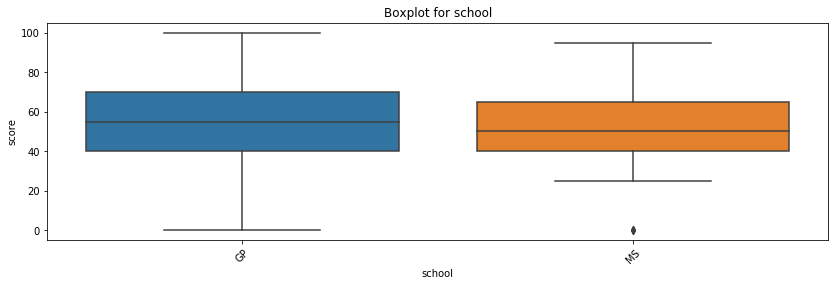

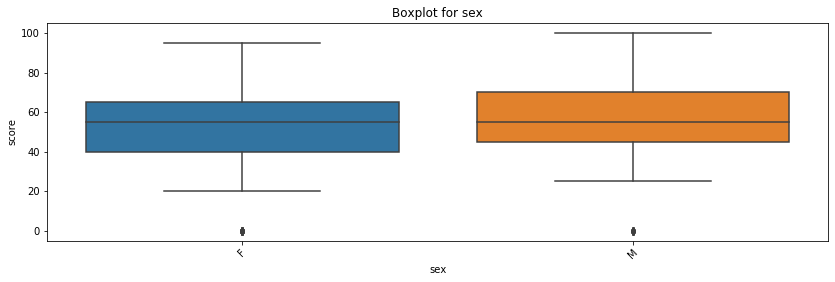

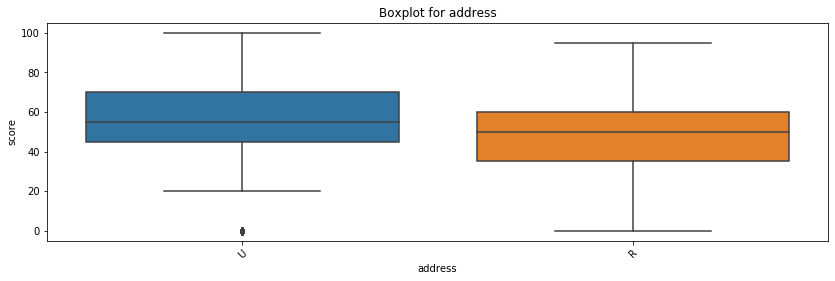

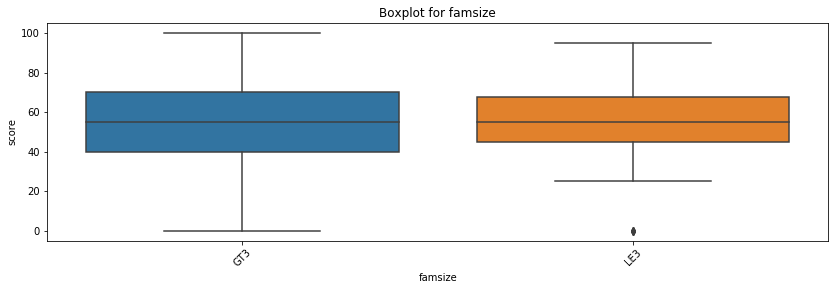

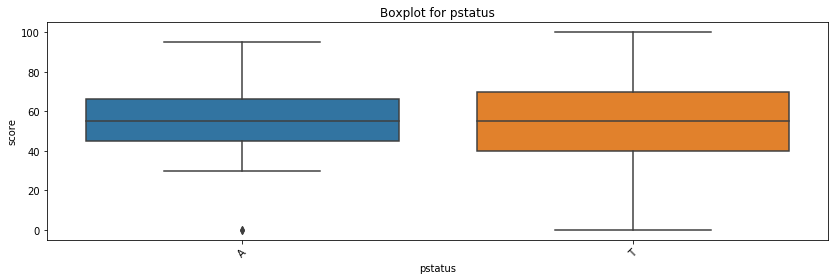

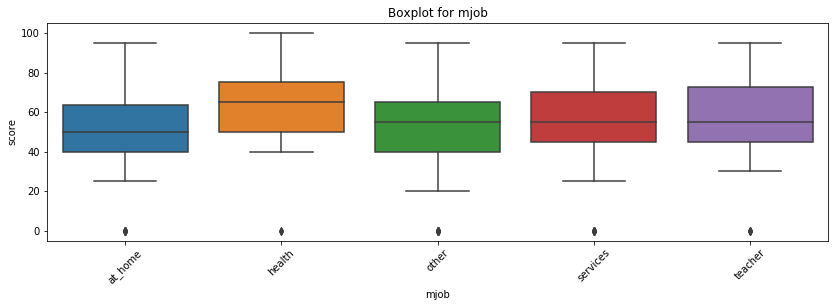

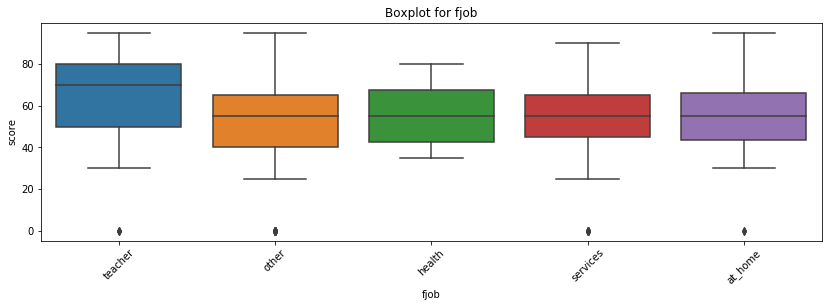

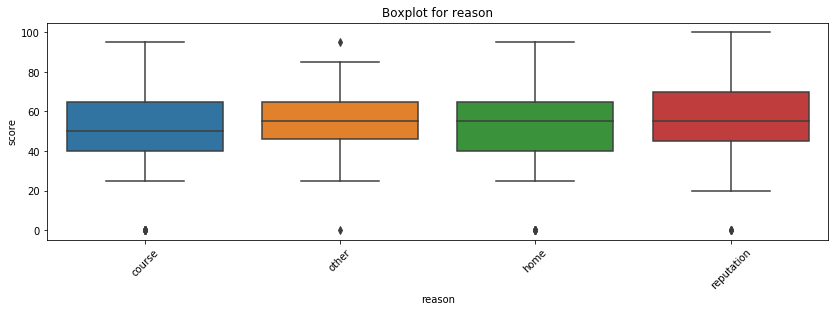

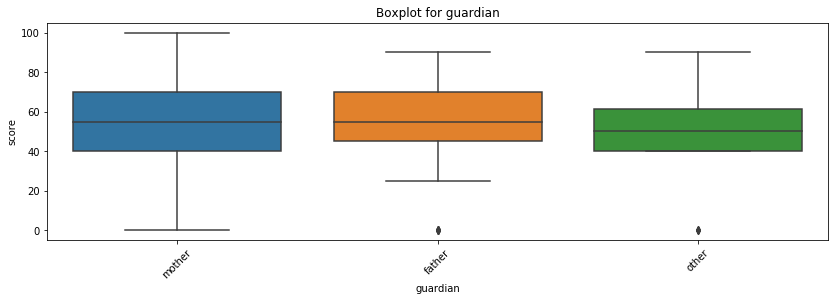

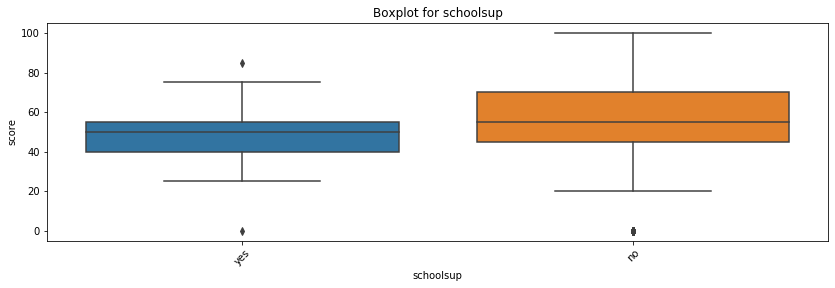

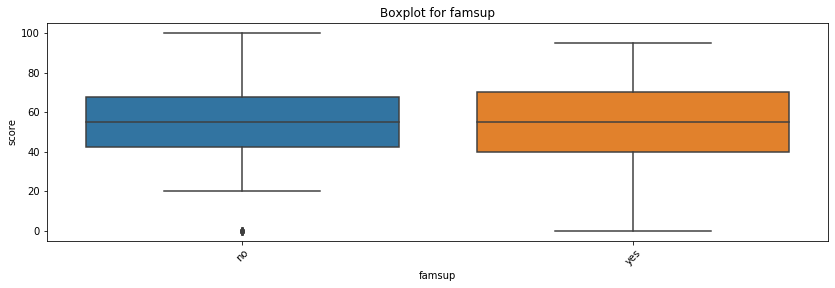

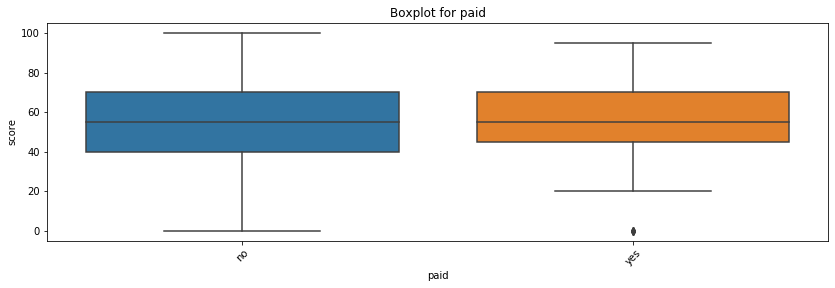

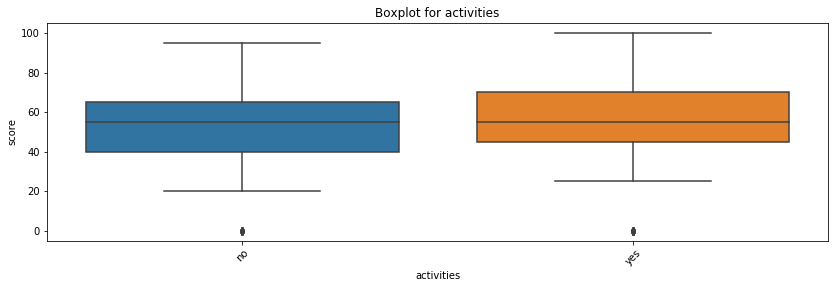

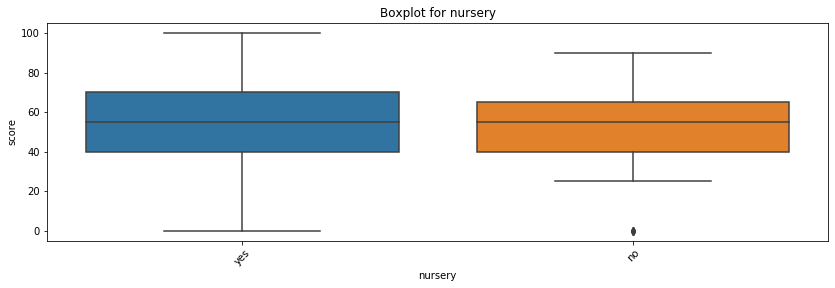

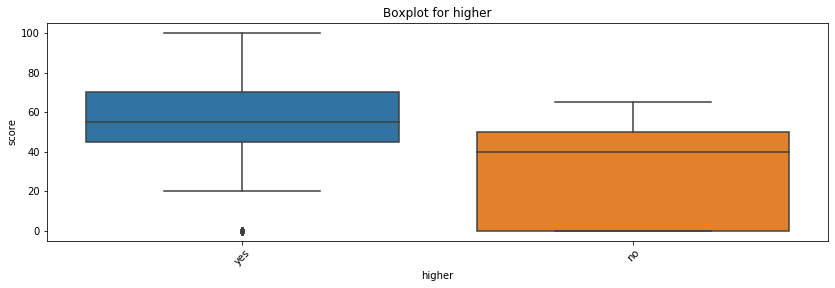

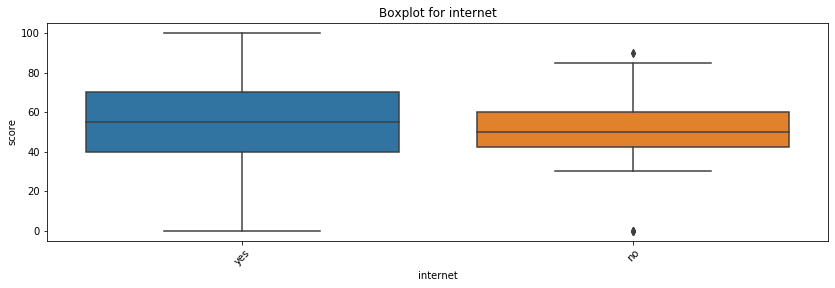

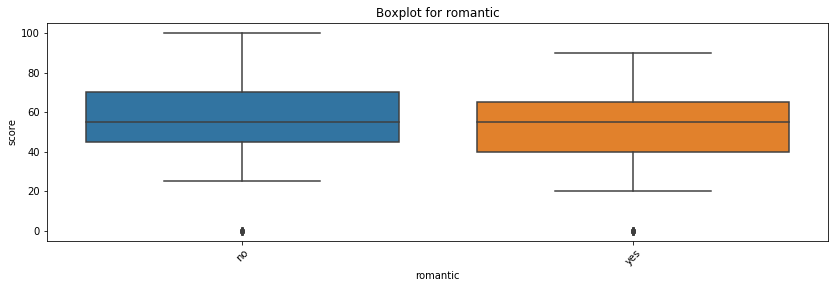

In [286]:
# Строим boxplot-диаграммы зависимости score от номинативных переменных:

for column_name in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(column_name)  # описание функции см.в Предобработке

Выводы: 

Boxplot-диаграммы показывают возможность наличия зависимости score от переменных mjob, fjob, schoolsup, higher

In [283]:
# Проверяем, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения баллов на экзамене по различным параметрам неразличимы:

for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)  # описание функции см.в Предобработке

Найдены статистически значимые различия для колонки mjob


Комментарии:

Зависимость score от schoolsup и higher статистически не подтвердается, видимо, потому, что каждая из этих переменных может принимать лишь два значения (yes/no) и количество одного из этих значений в каждом случаем существенно преобладает над количеством другого (для higher: yes - 356, no - 19; для schoolsup: no - 355, yes - 51).

## ИТОГИ

В датасете для дальнейшего построения модели оставляем колонки с очищенными числовыми данными, кроме 'studytime_granular'
('age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score') и одной колонкой с номинативными данными 'mjob'.

In [300]:
# Создаем датафрейм для модели:
# отфильтровываем отобранные для модели колонки,
# отфильтровываем строки с заполненнным значением score.

df_for_model = df.loc[:, ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
                          'mjob', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
df = df[df.score.isnull() == False]
df_for_model.head()

,age,medu,fedu,traveltime,studytime,failures,mjob,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,at_home,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,at_home,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,at_home,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,health,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,other,4.0,3.0,2.0,5.0,4.0,50.0


In [2]:
# ОПИСАНИЕ ЗНАЧЕНИЙ В КОЛОНКАХ:

# 1 age — возраст ученика (от 15 до 22)
# 2 medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 3 fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# 4 mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
#                         'at_home' - не работает, 'other' - другое)
# 5 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# 6 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# 7 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# 8 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# 9 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# 10 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# 11 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# 12 absences — количество пропущенных занятий
# 13 score — баллы по госэкзамену по математике

### ВЫВОДЫ:

#### 1.В данных достаточно мало пустых значений, выбросы найдены только в колонке сколичеством пропущенных занятий (absences), что позволяет сделать вывод о том, что данные достаточно чистые.

#### 2.Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: age, medu, fedu, mjob, traveltime, studytime, failures, famrel, freetime, goout, health, absences.